<a href="https://colab.research.google.com/github/vincentzouras/cse337/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [92]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5  # number of episodes to run
max_steps = 100  # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -1387
Episode 2: total reward = -100
Episode 3: total reward = -1882
Episode 4: total reward = -1684
Episode 5: total reward = -1585


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [93]:
import gymnasium as gym
import numpy as np
import random

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000  # number of episodes to run
max_steps = 100  # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
e = 0.1

def choose_action(Q, state):
    if random.random() <= e:
        return env.action_space.sample()
    return np.argmax(Q[state])

Q_sarsa = np.zeros((n_states, n_actions))
def sarsa():
  sarsa_rewards = []
  for episode in range(n_episodes):
      state, info = env.reset()
      action = choose_action(Q_sarsa, state)
      total_reward = 0
      for step in range(max_steps):
          next_state, reward, terminated, truncated, info = env.step(action)
          next_action = choose_action(Q_sarsa, next_state)
          Q_sarsa[state, action] = Q_sarsa[state, action] + learning_rate * (
              reward + discount_factor * Q_sarsa[next_state, next_action] - Q_sarsa[state, action]
          )
          state = next_state
          action = next_action
          total_reward += reward
          if terminated or truncated:
              break
      sarsa_rewards.append(total_reward)
sarsa()

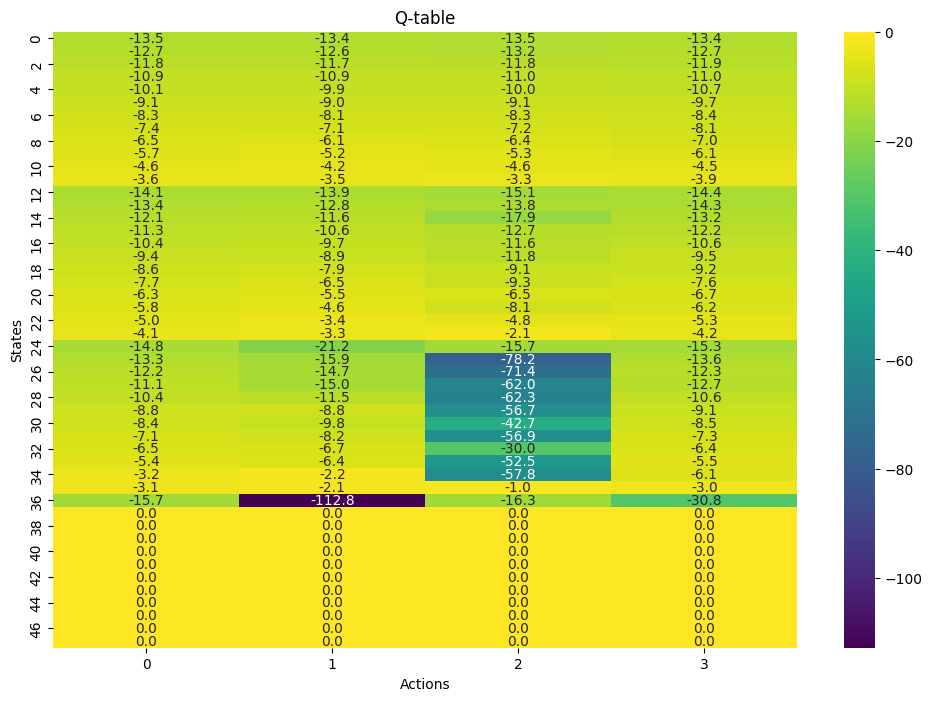

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q_sarsa)

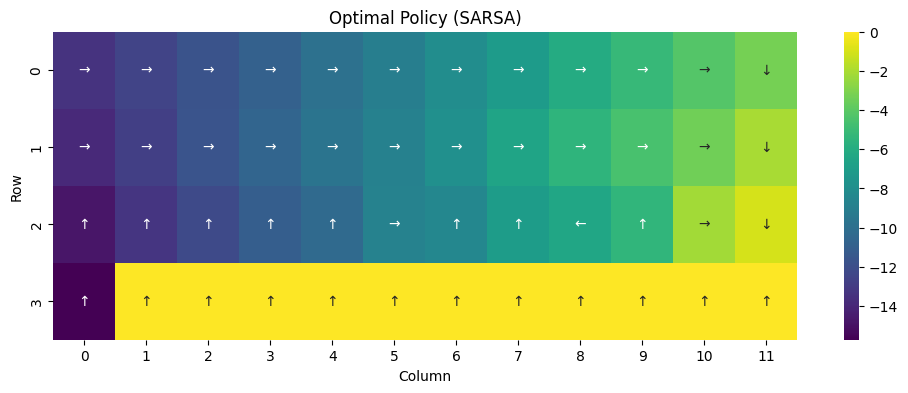

In [95]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q_sarsa)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [96]:
Q_qlearning = np.zeros((n_states, n_actions))
def qlearning():
  qlearning_rewards = []
  for episode in range(n_episodes):
      state, info = env.reset()
      total_reward = 0
      for step in range(max_steps):
          action = choose_action(Q_qlearning, state)
          next_state, reward, terminated, truncated, info = env.step(action)
          Q_qlearning[state, action] = Q_qlearning[state, action] + learning_rate * (
              reward + discount_factor * np.max(Q_qlearning[next_state]) - Q_qlearning[state, action]
          )
          state = next_state
          total_reward += reward
          if terminated or truncated:
              break
      qlearning_rewards.append(total_reward)
qlearning()

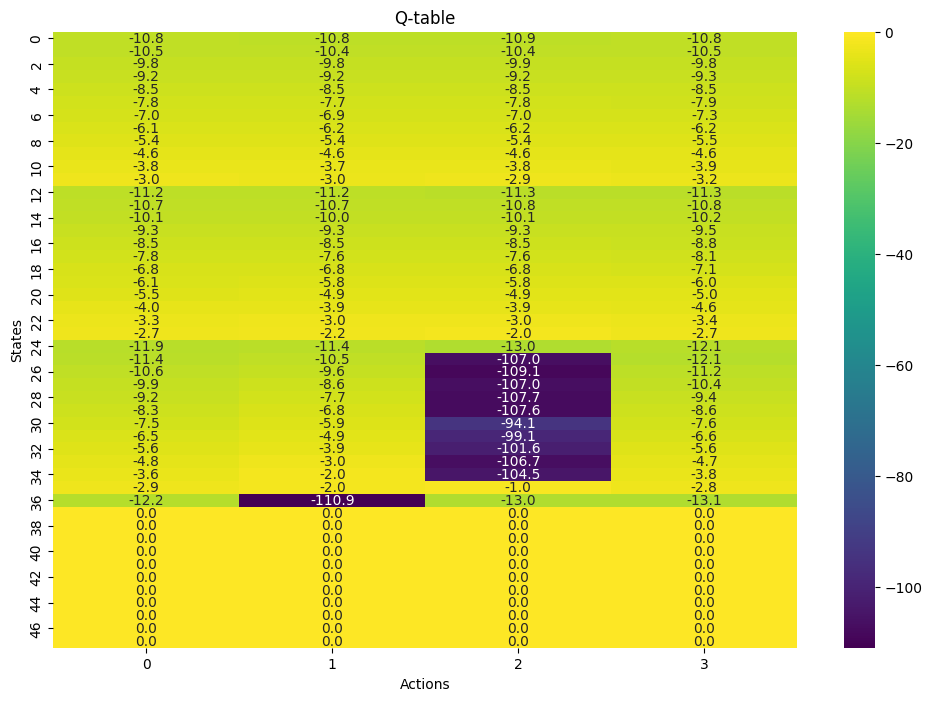

In [97]:
plot_Q(Q_qlearning)

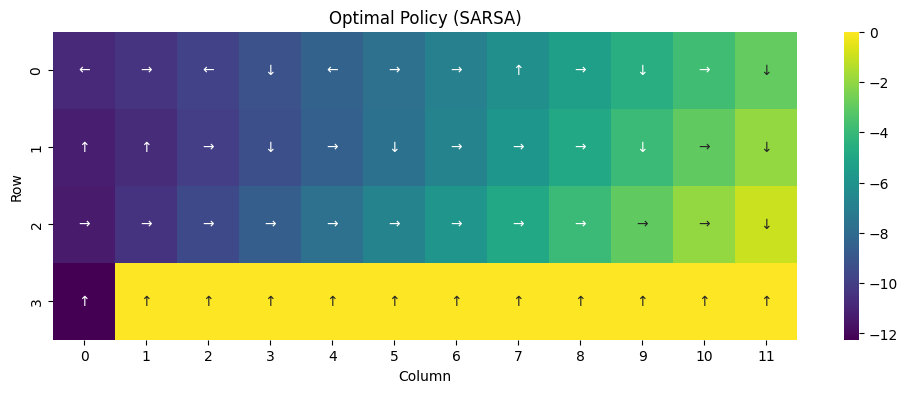

In [98]:
plot_policy(Q_qlearning, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


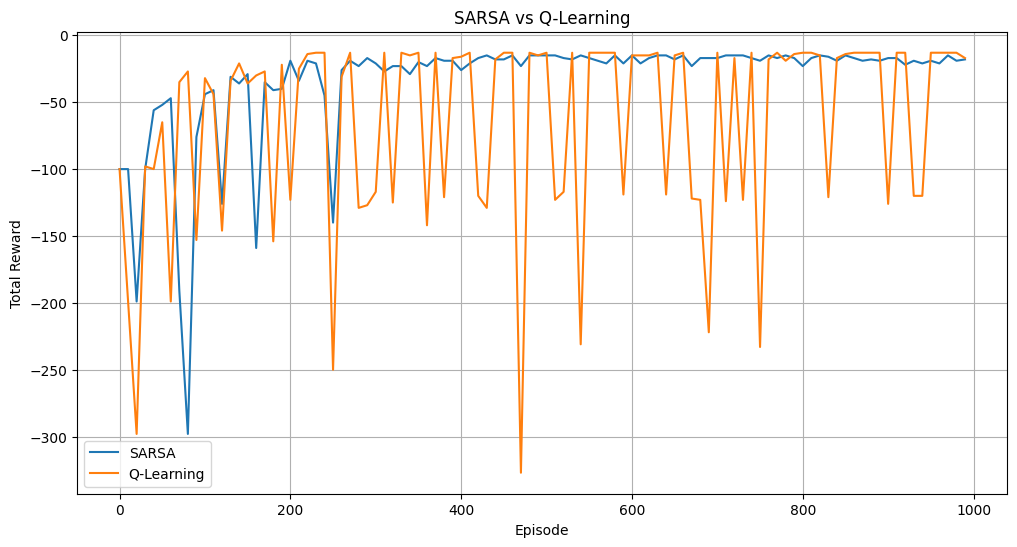

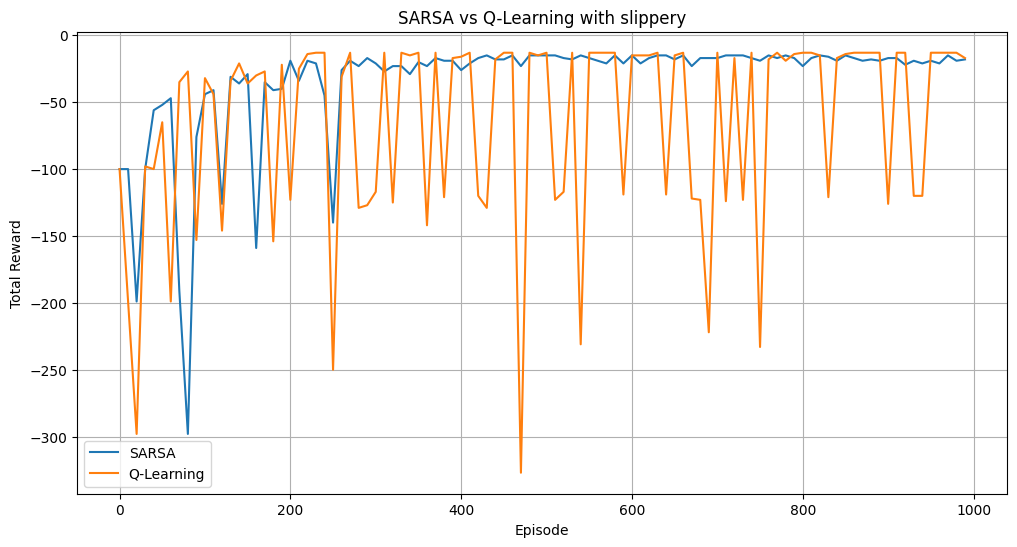

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(sarsa_rewards), 10), sarsa_rewards[::10], label="SARSA")
plt.plot(np.arange(0, len(qlearning_rewards), 10), qlearning_rewards[::10], label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("SARSA vs Q-Learning")
plt.legend()
plt.grid(True)
plt.show()

env = gym.make("CliffWalking-v1", render_mode="ansi", is_slippery=True)

Q_sarsa = np.zeros((n_states, n_actions))
Q_qlearning = np.zeros((n_states, n_actions))

qlearning()
sarsa()

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(sarsa_rewards), 10), sarsa_rewards[::10], label="SARSA")
plt.plot(np.arange(0, len(qlearning_rewards), 10), qlearning_rewards[::10], label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("SARSA vs Q-Learning with slippery")
plt.legend()
plt.grid(True)
plt.show()


# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
